<br>

<center><img src="https://www.htu.edu.jo/images/ThumbnailsCoverPhotos/HTU%20Logo-250px.png" alt="HTU"  width="180px" align="center"> 


<br>

<p> 

**Principles of Data Science and Computing Systems**

10204280

Section (3)

**Application of Data Science Life Cycle**

**Submitted to**

Dr. Murad Yaghi

**Submitted on**

January 30th, 2023

**Submitted by**

Marwan Tareq Shafiq Al Farah

**Student ID**

21110011

Fall 2022 – 2023
</p></center>

# **Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score,precision_score, recall_score, f1_score
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# **Classes**

## Multiple Linear Regression with Gradient Descent Class

In [2]:
class SGDRegressor:
  def _init_(self):
      self.theta = None

  def fit(self, X_train, y_train, theta, alpha, iters):
      self.theta = theta
      cost_array = np.zeros(iters)
      m = y_train.size
      for i in range(iters):
          error = np.dot(X_train, self.theta.T) - y_train
          cost = 1/(2*m) * np.dot(error.T, error)
          self.theta = self.theta - (alpha * (1/m) * np.dot(X_train.T, error))
          cost_array[i] = cost
          if i == 0:
            min = cost
            theta_min = self.theta.copy()
          if cost < min:
            min = cost
            theta_min = self.theta.copy()
      self.theta = theta_min
      return cost_array, iters

  def predict(self, X_test):
        y_pred = np.dot(X_test, self.theta)
        return y_pred

  def evaluation(self, norm, y_test, y_pred):
      print('Multiple Linear Regression with Gradient Descent ' + norm + ' Normalization:')
      print('Accuracy of the model is: ', r2_score(y_test,y_pred))
      print('Mean Squared Error:', mean_squared_error(y_test,y_pred))
      print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))
      print('Mean Absolute Error:', mean_absolute_error(y_test,y_pred))

## K-Nearest Neigbours Class

In [3]:
class KNeighborsClassifier:
    def __init__(self):
        self.k = 13

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for i in range(X_test.shape[0]):
            distances = np.linalg.norm(self.X_train - X_test.iloc[i], axis=1)
            nearest_neighbor_ids = distances.argsort()[:self.k]
            nearest_neighbor_rings = self.y_train.iloc[nearest_neighbor_ids]
            predictions.append(nearest_neighbor_rings.mode()[0])
            
        return predictions

    def evaluation(self, norm, y_test, y_pred):
        print('K-Nearest Neigbours ' + norm +' Normalization:')
        print("Accuracy: ",accuracy_score(y_test,y_pred))
        print("Precision: ",precision_score(y_test,y_pred, average = 'macro'))
        print("Recall: ",recall_score(y_test,y_pred, average = 'macro'))
        print("F1_score: ",f1_score(y_test,y_pred, average = 'macro'))

## MinMaxScaler Class

In [4]:
class MinMaxScaler:
    def __init__(self, feature_range=(0, 1)):
        self.feature_range = feature_range

    def fit(self, X):
        self.min = X.min(axis=0)
        self.scale = (X.max(axis=0) - X.min(axis=0)) / (self.feature_range[1] - self.feature_range[0])

    def transform(self, X):
        return (X - self.min) / self.scale

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

## StandardScaler Class

In [5]:
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

# **Data Loading**

In [6]:
df1 = pd.read_csv("/content/dataset.csv")

# **Data Preprocessing**

## drop()

In [7]:
df1 = df1.drop(['I_MRP_JD'], axis=1)

## I_Fat_C

In [8]:
df1['I_Fat_C'] = df1['I_Fat_C'].replace({'LF': 'Low Fat', 'reg': 'Regular'})

## I_W

In [9]:
df1.loc[df1['I_W'].notnull(), 'I_W'] = df1.groupby('I_Id')['I_W'].transform('first')
df1['I_W'].fillna(df1['I_W'].mean(), inplace = True)

## O_Size

In [10]:
df1.to_csv('non-numeric1.csv', index=False)
cat_columns = df1.select_dtypes(['object']).columns.drop('O_Size')
df1[cat_columns] = df1[cat_columns].apply(lambda x: pd.factorize(x)[0])
X = df1[df1['O_Size'].notnull()].drop(["O_Size"], axis=1)
y = df1[df1['O_Size'].notnull()]["O_Size"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
classiferRF = RandomForestClassifier()
classiferRF = classiferRF.fit(X_train,y_train)
df2 = df1[df1['O_Size'].isnull()].copy()
df2['O_Size'] = classiferRF.predict(df2.drop(["O_Size"], axis=1))
df3 = pd.read_csv("/content/non-numeric1.csv")
df3["O_Size"] = pd.concat([df2, df1[df1['O_Size'].notnull()]]).sort_index()['O_Size']
df3.to_csv('non-numeric2.csv', index=False)

# **Modeling**

## **SGDRegressor**

In [11]:
dfSGD  = pd.read_csv('/content/non-numeric2.csv')
cat_columns = dfSGD.select_dtypes(['object']).columns
dfSGD[cat_columns] = dfSGD[cat_columns].apply(lambda x: pd.factorize(x)[0])

### Min Max Normalization

In [12]:
min_max_scaler_SGD = MinMaxScaler()
dfSGD_min_max = pd.DataFrame(min_max_scaler_SGD.fit_transform(dfSGD), index = dfSGD.index, columns = dfSGD.columns)
X_SGD_min_max = dfSGD_min_max.drop(["I_O_Sales"], axis=1)
X_SGD_min_max = np.c_[np.ones(X_SGD_min_max.shape[0]), X_SGD_min_max]
y_SGD_min_max = dfSGD_min_max["I_O_Sales"]
X_train_SGD_min_max, X_test_SGD_min_max, y_train_SGD_min_max, y_test_SGD_min_max = train_test_split(X_SGD_min_max, y_SGD_min_max, test_size=0.2,random_state=0)

In [13]:
regressorSGD_min_max = SGDRegressor()
cost_array_min_max, iters_min_max = regressorSGD_min_max.fit(X_train_SGD_min_max, y_train_SGD_min_max, np.array([0]*X_train_SGD_min_max[1]), 0.125, 10000)
y_pred_SGD_min_max = regressorSGD_min_max.predict(X_test_SGD_min_max)
regressorSGD_min_max.evaluation("Min Max", y_test_SGD_min_max, y_pred_SGD_min_max)

Multiple Linear Regression with Gradient Descent Min Max Normalization:
Accuracy of the model is:  0.39264766690421404
Mean Squared Error: 0.010432226173145088
Root Mean Squared Error: 0.1021382698754247
Mean Absolute Error: 0.0771574371082237


### Z-score Normalization

In [14]:
standard_scaler_SGD = StandardScaler()
dfSGD_z_score  = pd.DataFrame(standard_scaler_SGD.fit_transform(dfSGD), index = dfSGD.index, columns = dfSGD.columns)
X_SGD_z_score = dfSGD_z_score.drop(["I_O_Sales"], axis=1)
X_SGD_z_score = np.c_[np.ones(X_SGD_z_score.shape[0]), X_SGD_z_score]
y_SGD_z_score = dfSGD_z_score["I_O_Sales"]
X_train_SGD_z_score, X_test_SGD_z_score, y_train_SGD_z_score, y_test_SGD_z_score = train_test_split(X_SGD_z_score, y_SGD_z_score, test_size=0.2,random_state=0)

In [15]:
regressorSGD_z_score = SGDRegressor()
cost_array_z_score, iters_z_score = regressorSGD_z_score.fit(X_train_SGD_z_score, y_train_SGD_z_score, np.array([0]*X_train_SGD_z_score[1]), 0.125, 10000)
y_pred_SGD_z_score = regressorSGD_z_score.predict(X_test_SGD_z_score)
regressorSGD_z_score.evaluation("Z-score", y_test_SGD_z_score, y_pred_SGD_z_score)

Multiple Linear Regression with Gradient Descent Z-score Normalization:
Accuracy of the model is:  0.3926486346150069
Mean Squared Error: 0.6104926635826023
Root Mean Squared Error: 0.7813402994743086
Mean Absolute Error: 0.590267189125531


### Without Normalization

In [16]:
X_SGD_WN = dfSGD.drop(["I_O_Sales"], axis=1)
X_SGD_WN = np.c_[np.ones(X_SGD_WN.shape[0]), X_SGD_WN]
y_SGD_WN = dfSGD["I_O_Sales"]
X_train_SGD_WN, X_test_SGD_WN, y_train_SGD_WN, y_test_SGD_WN = train_test_split(X_SGD_WN, y_SGD_WN, test_size=0.2,random_state=0)

In [17]:
regressorSGD_WN = SGDRegressor()
cost_array_WN, iters_WN = regressorSGD_WN.fit(X_train_SGD_WN, y_train_SGD_WN, np.array([0]*X_train_SGD_WN[1]), 0.125, 10000)
y_pred_SGD_WN = regressorSGD_WN.predict(X_test_SGD_WN)
regressorSGD_WN.evaluation("Without", y_test_SGD_WN, y_pred_SGD_WN)

Multiple Linear Regression with Gradient Descent Without Normalization:
Accuracy of the model is:  -640209388860.781
Mean Squared Error: 1.8738029015895035e+18
Root Mean Squared Error: 1368869205.4354584
Mean Absolute Error: 1365399045.652846


## **KNeighborsClassifier**

In [18]:
dfKNN = pd.read_csv("/content/non-numeric2.csv")
cat_columns = dfKNN.select_dtypes(['object']).columns
dfKNN[cat_columns] = dfKNN[cat_columns].apply(lambda x: pd.factorize(x)[0])
X_KNN = dfKNN.drop(["O_T"], axis=1)
y_KNN = dfKNN["O_T"]

### Min Max Normalization

In [19]:
min_max_scaler_KNN = MinMaxScaler()
X_KNN_min_max = pd.DataFrame(min_max_scaler_KNN.fit_transform(X_KNN), index = X_KNN.index, columns = X_KNN.columns)
X_train_KNN_min_max, X_test_KNN_min_max, y_train_KNN_min_max, y_test_KNN_min_max = train_test_split(X_KNN_min_max, y_KNN, test_size=0.2,random_state=0)

In [20]:
classifierKNN_min_max = KNeighborsClassifier()
classifierKNN_min_max.fit(X_train_KNN_min_max, y_train_KNN_min_max)
y_pred_KNN_min_max = classifierKNN_min_max.predict(X_test_KNN_min_max)
classifierKNN_min_max.evaluation("Min Max", y_test_KNN_min_max, y_pred_KNN_min_max)

K-Nearest Neigbours Min Max Normalization:
Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1_score:  1.0


### Z-score Normalization

In [21]:
standard_scaler_KNN = StandardScaler()
X_KNN_z_score = pd.DataFrame(standard_scaler_KNN.fit_transform(X_KNN), index = X_KNN.index, columns = X_KNN.columns)
X_train_KNN_z_score, X_test_KNN_z_score, y_train_KNN_z_score, y_test_KNN_z_score = train_test_split(X_KNN_z_score, y_KNN, test_size=0.2,random_state=0)

In [22]:
classifierKNN_z_score = KNeighborsClassifier()
classifierKNN_z_score.fit(X_train_KNN_z_score, y_train_KNN_z_score)
y_pred_KNN_z_score = classifierKNN_z_score.predict(X_test_KNN_z_score)
classifierKNN_z_score.evaluation("Z-score", y_test_KNN_z_score, y_pred_KNN_z_score)

K-Nearest Neigbours Z-score Normalization:
Accuracy:  0.9935483870967742
Precision:  0.9883233682112604
Recall:  0.9953633130081301
F1_score:  0.9917819104948413


### Without Normalization

In [23]:
X_train_KNN_WN, X_test_KNN_WN, y_train_KNN_WN, y_test_KNN_WN = train_test_split(X_KNN, y_KNN, test_size=0.2,random_state=0)

In [24]:
classifierKNN_WN = KNeighborsClassifier()
classifierKNN_WN.fit(X_train_KNN_WN, y_train_KNN_WN)
y_pred_KNN_WN = classifierKNN_WN.predict(X_test_KNN_WN)
classifierKNN_WN.evaluation("Without", y_test_KNN_WN, y_pred_KNN_WN)

K-Nearest Neigbours Without Normalization:
Accuracy:  0.7390029325513197
Precision:  0.5229239404306902
Recall:  0.4649218578334432
F1_score:  0.4389370583987962


# **Visualization**

## Line Charts

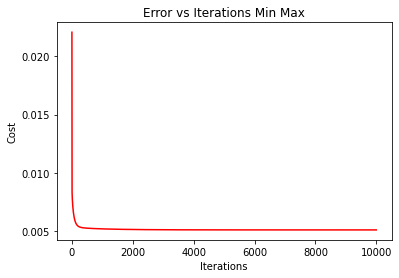

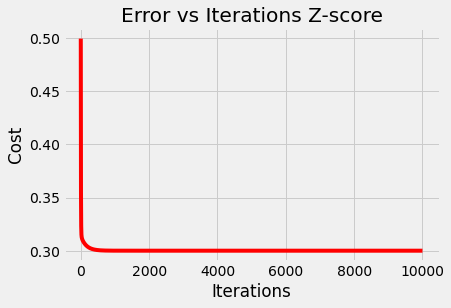

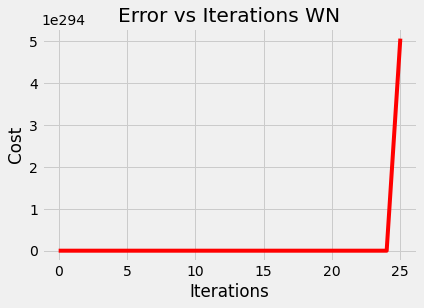

In [25]:
def plot_error_vs_iterations(iterations, cost, norm):
  fig, ax = plt.subplots()
  ax.plot(np.arange(iterations), cost, 'r')
  ax.set_xlabel('Iterations')
  ax.set_ylabel('Cost')
  ax.set_title('Error vs Iterations ' + norm)
  plt.style.use('fivethirtyeight')
  plt.show()
  print()

plot_error_vs_iterations(iters_min_max, cost_array_min_max, 'Min Max')
plot_error_vs_iterations(iters_z_score, cost_array_z_score, 'Z-score')
plot_error_vs_iterations(iters_WN, cost_array_WN, 'WN')

## **Bar Chart**

In [26]:
accuracies = [accuracy_score(y_test_KNN_min_max,y_pred_KNN_min_max), accuracy_score(y_test_KNN_z_score,y_pred_KNN_z_score), accuracy_score(y_test_KNN_WN,y_pred_KNN_WN)]
precisions = [precision_score(y_test_KNN_min_max,y_pred_KNN_min_max, average = 'macro'), precision_score(y_test_KNN_z_score,y_pred_KNN_z_score, average = 'macro'), precision_score(y_test_KNN_WN,y_pred_KNN_WN, average = 'macro')]
recalls = [recall_score(y_test_KNN_min_max,y_pred_KNN_min_max, average = 'macro'), recall_score(y_test_KNN_z_score,y_pred_KNN_z_score, average = 'macro'), recall_score(y_test_KNN_WN,y_pred_KNN_WN, average = 'macro')]
f1_scores = [f1_score(y_test_KNN_min_max,y_pred_KNN_min_max, average = 'macro'), f1_score(y_test_KNN_z_score,y_pred_KNN_z_score, average = 'macro'), f1_score(y_test_KNN_WN,y_pred_KNN_WN, average = 'macro')]
classifier_names = ['Min Max', 'Z-score', 'WN']
label_names = ["Accuracy", "Precision", "Recall", "F1 Score"]

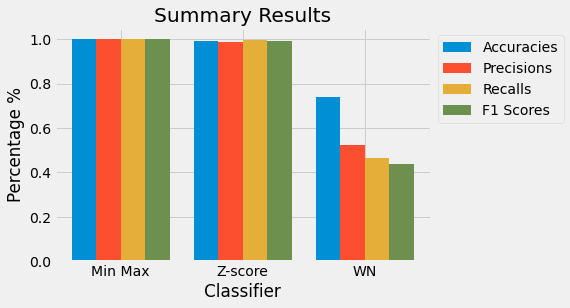

In [27]:
x_axis = np.arange(len(classifier_names))
plt.bar(x_axis+0.1, accuracies, label='Accuracies', width=0.2)
plt.bar(x_axis+0.3, precisions, label='Precisions', width=0.2)
plt.bar(x_axis+0.5, recalls, label='Recalls', width=0.2)
plt.bar(x_axis+0.7, f1_scores, label='F1 Scores', width=0.2)
plt.xticks(x_axis+0.4, classifier_names)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Classifier')
plt.ylabel('Percentage %')
plt.title('Summary Results')
plt.show()

## Radar Chart

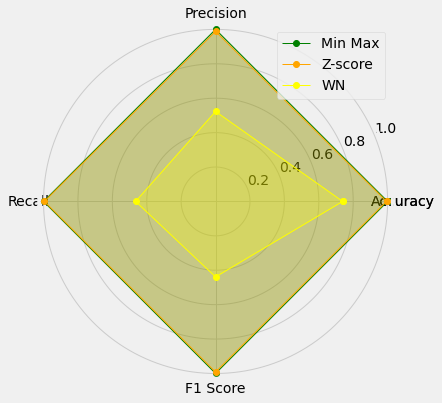

In [28]:
metrics = np.array([accuracies, precisions, recalls, f1_scores]).T.tolist()
min_max = metrics[0]
z_score = metrics[1]
WN = metrics[2]
angles=np.linspace(0,2*np.pi,len(label_names), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))
label_names.append(label_names[0])
min_max.append(min_max[0])
z_score.append(z_score[0])
WN.append(WN[0])
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(111, polar=True)
ax.plot(angles,min_max, 'o-', color='green', linewidth=1, label='Min Max')
ax.fill(angles, min_max, alpha=0.25, color='green')
ax.plot(angles,z_score, 'o-', color='orange', linewidth=1, label='Z-score')
ax.fill(angles, z_score, alpha=0.25, color='orange')
ax.plot(angles,WN, 'o-', color='yellow', linewidth=1, label='WN')
ax.fill(angles, WN, alpha=0.25, color='yellow')
ax.set_thetagrids(angles * 180/np.pi, label_names)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()